In [35]:
import numpy as np
from scipy.special import factorial
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
def series(x, n):
    x_loc = np.copy(x)  # чтобы не меняет переданный x
    pows = np.arange(n).astype(x.dtype)
    x_loc[x < 0] *= -1  # чтобы вычислять ряд для обычной экспоненты
    ans = np.sum(np.power(x_loc.reshape(-1, 1), pows) / factorial(pows), axis=1)
    ans[x < 0] **= -1  # поправка на отрицательную экспоненту
    return ans
    

def r8_err(x, n):
    return np.abs(np.exp(x) - series(x, n)) / np.exp(x)


def r4_err(x, n):
    return np.abs(np.exp(x) - series(x.astype(np.float32), n)) / np.exp(x)

In [37]:
sns.set()
num_d = 100000

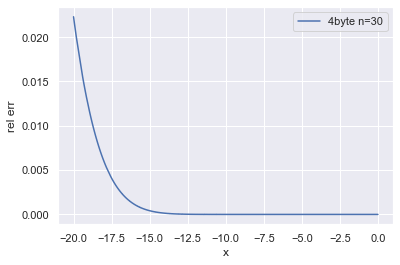

In [38]:
n_max = 30
x = np.linspace(-20, 0, num_d)
plt.plot(x, r4_err(x, n_max), label=f"4byte n={n_max}")
plt.xlabel("x")
plt.ylabel("rel err")
plt.legend()
plt.show()

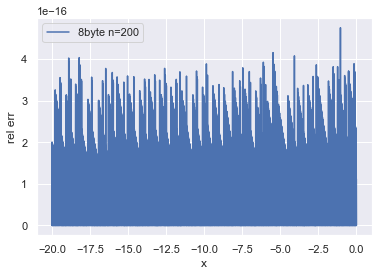

In [39]:
n_max = 200
x = np.linspace(-20, 0, num_d)
plt.plot(x, r8_err(x, n_max), label=f"8byte n={n_max}")
plt.xlabel("x")
plt.ylabel("rel err")
plt.legend()
plt.show()

Стоит отдельно отметить, что при использовании 4-байтовых чисел факториал быстро переполняется, по крайней мере в наивной реализации деления k-ого члена суммы на $k!$, поэтому в наивной реализации нехватает членов для всего исследуемого диапазона $x \in [-20, 0]$.

В то же время при использовании 8-байтовых чисел видно, что относительная погрешность при большом количестве членов суммы в целом состовляет по порядку величины $10^{-16}$ и носит пусть и паттерный, но в целом, скорее, хаотичный характер для всего представленного диапазона $x \in [-20, 0]$, что говорит о том, что выбранного количества членов суммы $n = 200$ хватает для точного воспроизведения значений $e^x$ в рамках данной численно точности (если мне не изменяет память, то в целом для 8-байтовых чисел как раз в районе 15 знаков после запятой можно считать достоверно вычисленными).

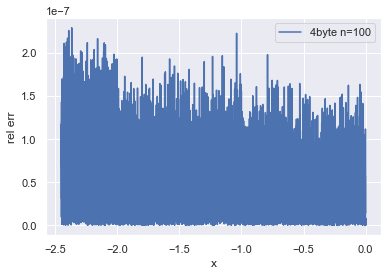

In [40]:
n_max = 100
x = np.linspace(-20, 0, num_d)
plt.plot(x, r4_err(x, n_max), label=f"4byte n={n_max}")
plt.xlabel("x")
plt.ylabel("rel err")
plt.legend()
plt.show()

В целом, этот график здесь для того, чтобы, во-первых, показать, что действительно случается переполнение для 4-байтовой арифметики, а также, что для меньшего диапазона $x$ относительная ошибка по характеру похожа на ту, что можно наблюдать для 8-байтовой арифметики с поправкой на то, что достоверных знаков меньше.